<a href="https://colab.research.google.com/github/valeriopagliarino/Electronics-2021-UNITO/blob/main/analysis/4_Delay_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis: delay line

### October 11th 2021
<p>
Authors: <b> Stefano Barbero, Valerio Pagliarino, Matteo Barbagiovanni, Federico Malnati </b> <p>Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 11/10/2021


## Configuration

### Clone the GIT

In [ ]:
!rm -r ./sample_data
import os
from getpass import getpass
user = input('GitHub user')
mail = input('GitHub email')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/valeriopagliarino/Electronics-2021-UNITO.git
!git config --global user.email user
!git config --global user.name mail

### Install environment

In [ ]:
exec(open("./Electronics-2021-UNITO/analysis/ROOT-config.py").read())

Start config for JupyROOT Env. on Google Coolab - It takes about 3 minutes
WGET...
Done.
UNZIP...
TAR...
APT...
Installation completed.
Shared objects loaded.
Welcome to JupyROOT 6.14/04
Completed!


### Importa moduli [no COLAB]

In [ ]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from matplotlib import pyplot as plt

from uncertainties import ufloat
import uncertainties.umath

import pickle

import ROOT # Per COLAB importato da ROOT-config.py

DATADIR = "../data-source"
OUTPUTDIR = "./output"

### Importa moduli [COLAB]

In [3]:
%cd /content/
!pip3 install uncertainties
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from uncertainties import ufloat
import uncertainties.umath
from matplotlib import pyplot as plt
import pickle#Pickle with dict of Numpy arrays

# Variables for directories
DATADIR = "/content/Electronics-2021-UNITO/data-source"
OUTPUTDIR = "/content/Electronics-2021-UNITO/analysis/output"

/content
     |████████████████████████████████| 98 kB 7.0 MB/s 


### Funzioni per l'importazione file Tektronix

In [4]:
import csv

def cellFromCSV(path, row_index, col_index):
  with open(path, 'r') as f:
    mycsv = csv.reader(f)
    column = []
    for row in mycsv:
        column.append(row[col_index])

  return column[row_index]


def openTek(path):
  a = pd.read_table(path, header=None, sep=",", usecols=[3,4])
  a = a.transpose()
  a = a.rename(index={3: 'Time', 4: 'Amplitude'})
  a = a.transpose()

  data = {'Record lenght': cellFromCSV(path, 0, 1),
          'Sample interval': cellFromCSV(path, 1, 1),
          'Trigger point': cellFromCSV(path, 2, 1),
          'Source': cellFromCSV(path, 6, 1),
          'Vertical units': cellFromCSV(path, 7, 1),
          'Vertical scale': cellFromCSV(path, 8, 1),
          'Vertical offset': cellFromCSV(path, 9, 1),
          'Horizontal units': cellFromCSV(path, 10, 1),
          'Horizontal scale': cellFromCSV(path, 11, 1),
          'Pt FMT': cellFromCSV(path, 12, 1),
          'Y zero': cellFromCSV(path, 13, 1),
          'Probe atten': cellFromCSV(path, 14, 1),
          'Model': cellFromCSV(path, 15, 1),
          'Serial': cellFromCSV(path, 16, 1),
          'Firmware': cellFromCSV(path, 17, 1),
          'Data' : a
  }
  return data

## Delay line

### Single pulses

In [ ]:
DEL_shorted_pulse_2_ch1 = openTek(f'{DATADIR}/11-10-21/DL_shorted_pulse_2/F0004CH1.CSV')
DEL_shorted_pulse_2_ch2 = openTek(f'{DATADIR}/11-10-21/DL_shorted_pulse_2/F0004CH2.CSV')
DEL_matched_pulse_2_ch1 = openTek(f'{DATADIR}/11-10-21/DL_matched_pulse2/F0002CH1.CSV')
DEL_matched_pulse_2_ch2 = openTek(f'{DATADIR}/11-10-21/DL_matched_pulse2/F0002CH2.CSV')
DEL_open_pulse_2_ch1    = openTek(f'{DATADIR}/11-10-21/DL_open_pulse/F0000CH1.CSV')
DEL_open_pulse_2_ch2    = openTek(f'{DATADIR}/11-10-21/DL_open_pulse/F0000CH2.CSV')

In [ ]:
DEL_shorted_pulse_2_ch1_time = DEL_shorted_pulse_2_ch1['Data'].to_numpy().transpose()[0]
DEL_shorted_pulse_2_ch1_sign = DEL_shorted_pulse_2_ch1['Data'].to_numpy().transpose()[1]
DEL_shorted_pulse_2_ch2_time = DEL_shorted_pulse_2_ch1['Data'].to_numpy().transpose()[0]
DEL_shorted_pulse_2_ch2_sign = DEL_shorted_pulse_2_ch1['Data'].to_numpy().transpose()[1]
DEL_matched_pulse_2_ch1_time = DEL_matched_pulse_2_ch1['Data'].to_numpy().transpose()[0]
DEL_matched_pulse_2_ch1_sign = DEL_matched_pulse_2_ch1['Data'].to_numpy().transpose()[1]
DEL_matched_pulse_2_ch2_time = DEL_matched_pulse_2_ch2['Data'].to_numpy().transpose()[0]
DEL_matched_pulse_2_ch2_sign = DEL_matched_pulse_2_ch2['Data'].to_numpy().transpose()[1]
DEL_open_pulse_2_ch1_time    = DEL_open_pulse_2_ch1['Data'].to_numpy().transpose()[0]
DEL_open_pulse_2_ch1_sign    = DEL_open_pulse_2_ch1['Data'].to_numpy().transpose()[1]
DEL_open_pulse_2_ch2_time    = DEL_open_pulse_2_ch2['Data'].to_numpy().transpose()[0]
DEL_open_pulse_2_ch2_sign    = DEL_open_pulse_2_ch2['Data'].to_numpy().transpose()[1]

### Repetition of pulses

### Sine: $\lambda = 2L$ - Open end

Text(0.5, 1.0, 'sin(x)*cos(x)')

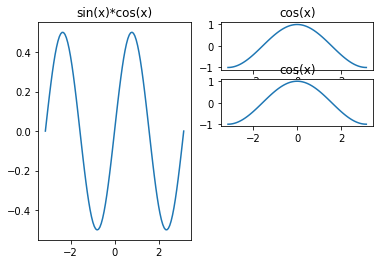

In [110]:
(f'{DATADIR}/11-10-21/DL_open_pulse/F0000CH2.CSV')

b=np.linspace(-np.pi, np.pi, 100)

a1=np.sin(b)

a2=np.cos(b)

a3=a1*a2

plt.subplot(421)
plt.plot(b, a1)
plt.title('sin(x)')

plt.subplot(422)
plt.plot(b, a2)
plt.title('cos(x)')

plt.subplot(423)
plt.plot(b, a1)
plt.title('sin(x)')

plt.subplot(424)
plt.plot(b, a2)
plt.title('cos(x)')

plt.subplot(121)
plt.plot(b, a3)
plt.title('sin(x)*cos(x)')

### Sine: $\lambda = 2L$ - Shorted end

### Sine: $\lambda = 2L$ - Matched end

### Sine: $\lambda = L$ - Open end

### Sine: $\lambda = L$ - Shorted end

### Sine: $\lambda = L$ - Matched end

## Commit changes

In [ ]:
%cd /content/Electronics-2021-UNITO/
!git pull
!git add .
!git commit -m "Plots from data analysis"
!git push 